Using xGboost


Using XG-Boost on a red/white wine Dataset

In [ ]:
#Plot the data
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt


import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "winequality-red.csv"

# Load the latest version
wine_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/red-wine-quality-cortez-et-al-2009",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", wine_df.head())


# Display the shape of the DataFrame
print("Shape of the Wine DataFrame:", wine_df.shape)


/tmp/ipython-input-603043712.py:14: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  wine_df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'red-wine-quality-cortez-et-al-2009' dataset.
First 5 records:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  

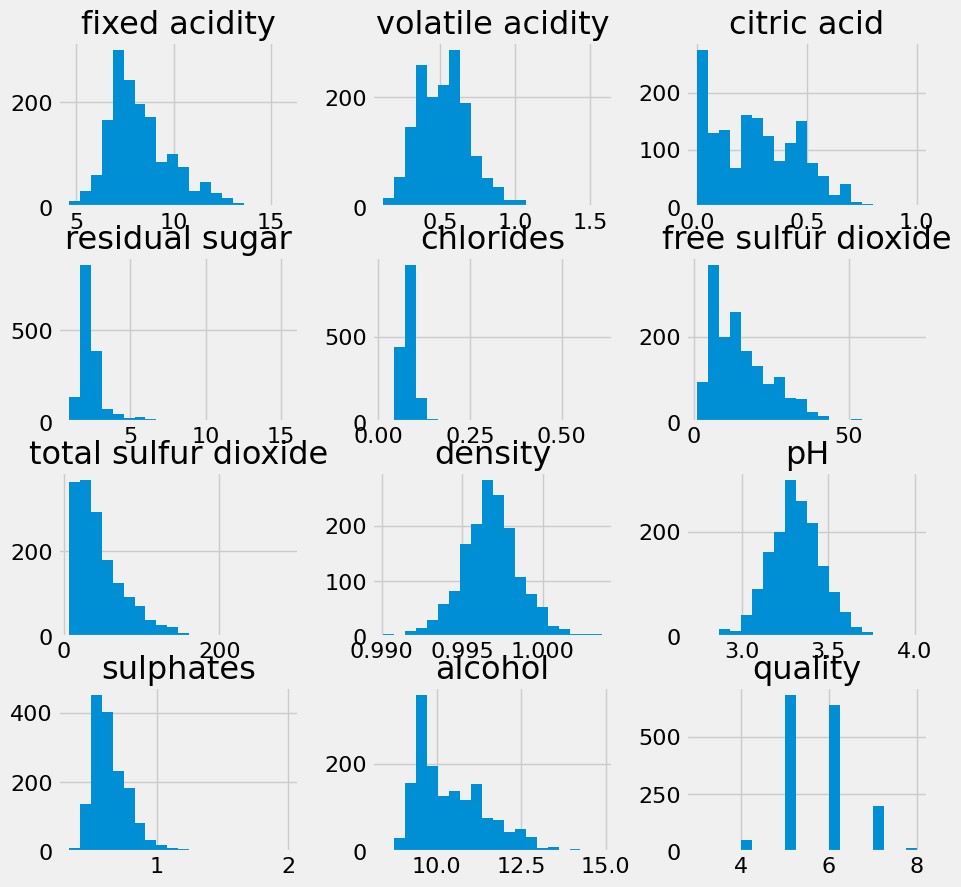

In [ ]:
wine_df.hist(bins=20, figsize=(10, 10))
plt.show()

In [ ]:
#features = features.fillna(features.mean())
wine_df['best quality'] = [1 if x > 5 else 0 for x in wine_df.quality]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
features = wine_df.drop(['quality', 'best quality'], axis=1)
target = wine_df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

## Xg_Boost for Regression


Deploying grid search to find the optimum

---



In [ ]:
import xgboost as xgb
regressor=xgb.XGBRegressor(eval_metric='rmsle')


from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

search = GridSearchCV(regressor, param_grid, cv=5, scoring="neg_mean_squared_log_error").fit(xtrain, ytrain)


In [ ]:
import numpy as np
# display the search results
search_results = pd.DataFrame(search.cv_results_)
columns = [column for column in search_results if column.startswith('param_')]
columns.append("mean_test_score")
columns.append("rank_test_score")
# convert mean_test_score to RMSLE and add to table
search_results["RMSLE"] = np.sqrt(-search_results["mean_test_score"])
columns.append("RMSLE")
search_results[columns].sort_values(by='mean_test_score', ascending=False)

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score,rank_test_score,RMSLE
16,0.015,6,600,-0.078066,1,0.279403
15,0.015,6,500,-0.078078,2,0.279424
6,0.010,6,500,-0.078083,3,0.279433
7,0.010,6,600,-0.078091,4,0.279448
8,0.010,6,700,-0.078242,5,0.279718
17,0.015,6,700,-0.078287,6,0.279799
14,0.015,5,700,-0.078299,7,0.279820
13,0.015,5,600,-0.078485,8,0.280152
12,0.015,5,500,-0.078622,9,0.280395
5,0.010,5,700,-0.078940,10,0.280962


In [ ]:
regressor.fit(xtrain, ytrain)


predictions = regressor.predict(xtest)

## Regression Result

In [ ]:
from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(ytest, predictions) )
print("The score is %.5f" % RMSLE )

The score is 0.26909


## Feature Importance

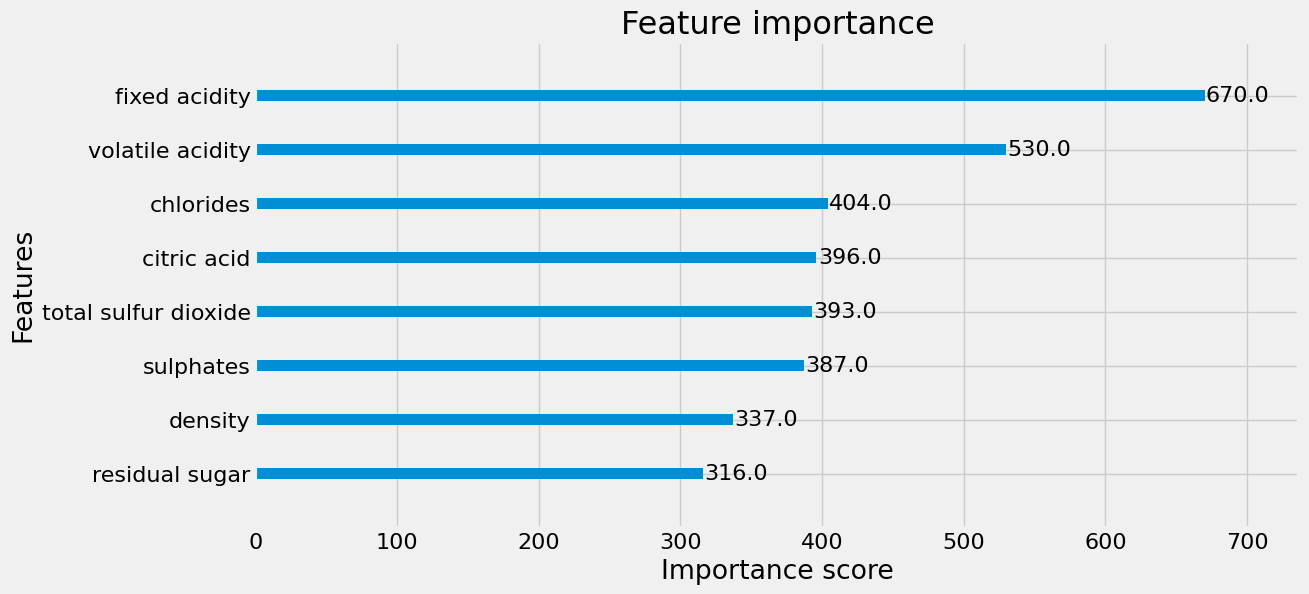

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=8, ax=ax)
plt.show();

## Using XG-Boost for classification

Try to classify wine quality
Quality > 5 = Good

Splitting the dataset in 80/20 train-test ratio

In [ ]:



from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

xtrain.shape, xtest.shape

norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


## Train three different Models SVC, XG-Boost, Linear Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import time
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    start_time = time.time()
    models[i].fit(xtrain, ytrain)
    end_time = time.time()

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))

    print(f"Training time: {end_time - start_time} seconds")
    print()

LogisticRegression() : 
Training Accuracy :  0.7386369776546466
Validation Accuracy :  0.7745271519012229
Training time: 0.0285947322845459 seconds

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8495143722228776
Training time: 0.150

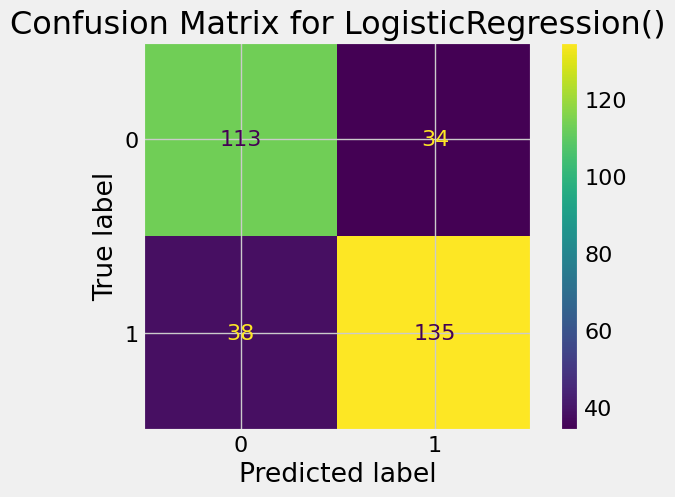

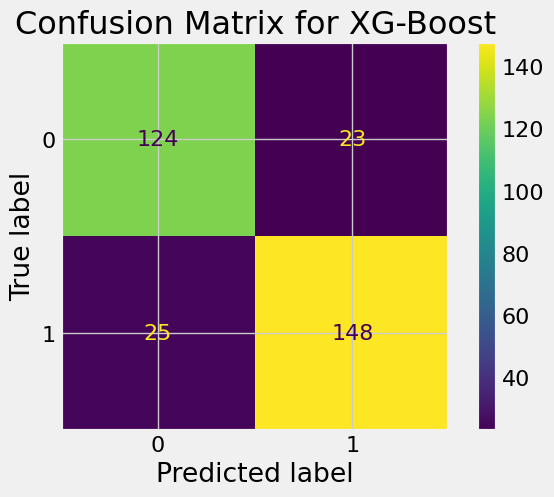

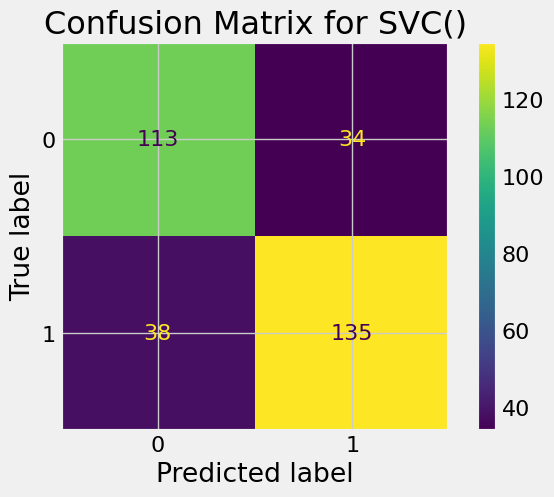

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'models[1]' is your trained classifier
for i in range(3):
  cm = confusion_matrix(ytest, models[i].predict(xtest))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[i].classes_) # Assuming your model has a 'classes_' attribute
  disp.plot()
  if i ==1:
    plt.title(f'Confusion Matrix for XG-Boost')
  else:
    plt.title(f'Confusion Matrix for {models[i]}')
  plt.show()
